# Setup

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# outline of where the neighborhoods are defined
neighborhoods = gpd.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/4af8e160-57e9-4ebf-a501-76ca1b42fc99/download/neighborhoods.geojson")

In [3]:
# outline of where the parks are
parks = gpd.read_file("https://data.wprdc.org/dataset/e298e2ae-07c0-4aa4-a2ca-2c8db845b552/resource/ca4ee6a6-3058-487f-9724-2a335b2d79f2/download/parks.geojson")

# Exploring

let's take a look at the data we found

In [4]:
neighborhoods.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_user,created_date,last_edited_user,last_edited_date,temp,pghdb_sde_Neighborhood_2010_are,GlobalID,Shape__Area,Shape__Length,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 13:02:13+00:00,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((-79.90531 40.45549, -79.90488 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 13:02:41+00:00,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((-79.92063 40.44423, -79.92052 40.443..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 12:59:55+00:00,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((-79.93546 40.47257, -79.9353 40.4725..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 12:58:41+00:00,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((-79.96601 40.4552, -79.96595 40.4548..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14 12:57:28+00:00,SDE,2020-08-14 13:00:19+00:00,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((-79.98819 40.41852, -79.98824 40.418..."


40 columns! We only need a few here, and so many columns where the data dictionary doesn't explain anything about. Let's just take what feels useful and leave the rest to rot.

In [5]:
neighborhoods.dtypes

OBJECTID                                         int32
fid_blockg                                       int32
statefp10                                       object
countyfp10                                      object
tractce10                                       object
blkgrpce10                                      object
geoid10                                         object
namelsad10                                      object
mtfcc10                                         object
funcstat10                                      object
aland10                                          int32
awater10                                         int32
intptlat10                                      object
intptlon10                                      object
shape_leng                                     float64
fid_neighb                                       int32
perimeter                                      float64
neighbor_                                        int32
neighbor_i

In [6]:
# Let's get rid of bunch of useless columns in neighbords
neighborhoods_sm = neighborhoods[['OBJECTID', 'hood', 'acres', 'geometry']].copy()
neighborhoods_sm.rename(columns={'OBJECTID':'id'}, inplace=True)
neighborhoods_sm.head()

,id,hood,acres,geometry
0,1,Point Breeze North,193.229239,"POLYGON ((-79.90531 40.45549, -79.90488 40.455..."
1,2,Squirrel Hill North,782.981547,"POLYGON ((-79.92063 40.44423, -79.92052 40.443..."
2,3,Garfield,292.726125,"POLYGON ((-79.93546 40.47257, -79.9353 40.4725..."
3,4,Bedford Dwellings,112.431551,"POLYGON ((-79.96601 40.4552, -79.96595 40.4548..."
4,5,Knoxville,191.759777,"POLYGON ((-79.98819 40.41852, -79.98824 40.418..."


In [147]:
# Let's see some of our biggest parks!
parks.sort_values('Shape__Area', ascending=False).head()

,OBJECTID_1,objectid,acreage,sqft,final_cat,type_,sector,origpkname,updatepknm,alterntnam,...,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,GlobalID_1,Shape__Area,Shape__Length,geometry
179,1384,398823.0,637.409429,2.776555e+07,Regional Park,RP,8,Hays Woods,Hays Woods,Hays Woods,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - McKinley,637.40942892,e25fa8dd-0b5a-4576-b850-7030d41cdef1,4.452877e+06,16420.931271,"MULTIPOLYGON (((-79.95616 40.40915, -79.95614 ..."
189,1394,71.0,606.639071,2.642509e+07,Regional Park,RP,10,Frick Park,Frick Park,Frick Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Frick,606.639070993222,4801a197-67f6-41b7-a4f9-247912f5d0b1,4.241798e+06,29982.680439,"MULTIPOLYGON (((-79.89766 40.43955, -79.89635 ..."
171,1375,164.0,434.082623,1.890856e+07,Regional Park,RP,10,Schenley Park,Schenley Park,Schenley Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Schenley,434.08262293757,e10190c0-b707-4549-ad1a-2a9656880668,3.035712e+06,49416.679558,"MULTIPOLYGON (((-79.94597 40.4347, -79.94594 4..."
192,1397,89.0,377.910577,1.646172e+07,Regional Park,RP,12,Highland Park,Highland Park,Highland Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Highland,377.910576753222,11aed98c-3830-4654-8ca2-a119b0851c07,2.646465e+06,43040.621067,"MULTIPOLYGON (((-79.91376 40.48605, -79.91376 ..."
98,1301,160.0,258.604289,1.126476e+07,Regional Park,RP,2,Riverview Park,Riverview Park,Riverview Park,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,Parks - Riverview,258.604288750231,fde516ec-24e4-4dd5-a0c0-20db35a84ee8,1.811035e+06,28925.141466,"MULTIPOLYGON (((-80.01303 40.48328, -80.01372 ..."


<Axes: >

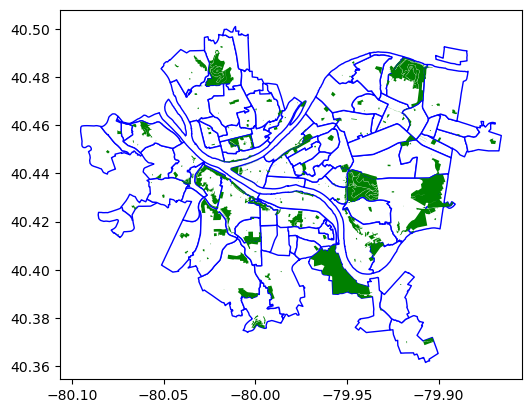

In [8]:
basePlot = neighborhoods.plot(color="white", edgecolor="blue")
parks.plot(ax=basePlot, color='green')

In [90]:
parks.sort_values('Shape__Area', ascending=True).head()

,OBJECTID_1,objectid,acreage,sqft,final_cat,type_,sector,origpkname,updatepknm,alterntnam,...,created_user,created_date,last_edited_user,last_edited_date,maintenanceresponsibility,dpw_ac,GlobalID_1,Shape__Area,Shape__Length,geometry
110,1313,76.0,0.001069,46.583703,Beautification Site,BTF,10,Glen Arden Circle,Glen Arden Circle,Glen Arden Circle,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,3rd Division,1.06941895512493E-03,ffe310c4-411a-4b2f-afe4-1bf65aa52fc0,7.496094,9.744908,"POLYGON ((-79.91313 40.44714, -79.91313 40.447..."
64,1267,57.0,0.001654,72.047334,Beautification Site,BTF,10,Edgerton Circle,Edgerton Circle,Edgerton Circle,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,3rd Division,1.65398580598273E-03,c68e42cd-f774-4566-afe1-1284003edf1b,11.566406,12.112985,"POLYGON ((-79.91316 40.44788, -79.91317 40.447..."
27,1230,77.0,0.007205,313.865892,Beautification Site,BTF,10,Glen Arden Triangle,Glen Arden Triangle,Glen Arden Triangle,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,3rd Division,7.20539825269681E-03,e2ca5ae4-f359-40d7-8f6a-d8b807385e98,50.410156,28.041217,"POLYGON ((-79.91185 40.44823, -79.91186 40.448..."
52,1255,192.0,0.013014,566.908068,Beautification Site,BTF,4,Westwood Island,Westwood Island,Westwood Island,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,5th Division,1.30144705159557E-02,bbcb51ce-5ee7-452a-8885-9fd9f6476b50,91.003906,37.310291,"POLYGON ((-80.05394 40.43781, -80.05394 40.437..."
205,1410,223.0,0.016442,716.216961,Special Use Park,SU,10,None,Swisshelm War Memorial,None,...,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,pgh.dcp.allisot,2023-08-02 14:10:28.845000+00:00,3rd Division,0.016442144773045,bd2298aa-84c6-43de-b879-2f673e368eef,114.937500,46.472163,"POLYGON ((-79.89988 40.42077, -79.89976 40.420..."


Now, both data are put for us in a geographic CRS ([Coordinate Reference System](https://geopandas.org/en/stable/docs/user_guide/projections.html)). While this allows GeoPandas to work preserving both area and shape, it doesn't allow us to some geometric manipulations we will do later on. Therefore, we will re-project both data sets into a 2d projection. Fortunately, since Pittsburgh is a relatively small area compared to the size of the earth, the projection we use will not visible distortions and have any signficant affecct on any of the findings.

/scratch/slurm-13218/ipykernel_4766/455123662.py:4: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  basePlot = neighbor_flat.plot(neighbor_flat, color="white", edgecolor="blue")


<Axes: >

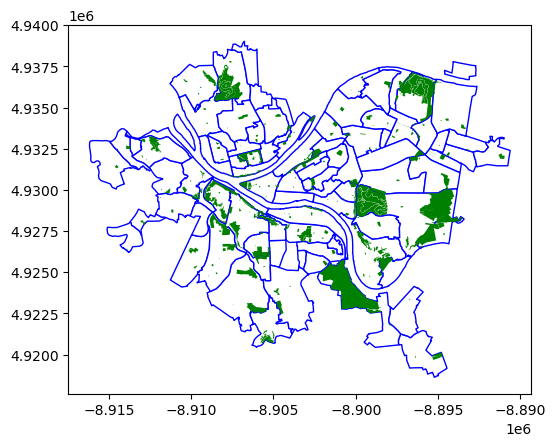

In [9]:
parks_flat = parks.to_crs(crs=3857)
neighbor_flat = neighborhoods_sm.to_crs(crs=3857)

basePlot = neighbor_flat.plot(neighbor_flat, color="white", edgecolor="blue")
parks_flat.plot(ax=basePlot, color='green')

## Thinking about a Metric

The objective is to find a metric that roughly estimates how parks impact how nice it is to live in each neighborhood. 

The simplest, and a very crude approach would be simply count the number of parks in each neighboard. A neighborhood with more parks inside its borders should be ranked higher.

However, this doesn't take into account how big a park is. All things equal, a big park would bring more utility than a small park. It probably has more playgrounds, places to picnic, etc. So the adjustment we can make would be to give a ranking based on the % of land in each neighorhood that is a park.

Thinking more closely however, is that really a sensible way to measure park utility? If a park A is 50 times larger than park B, is it really 50 times better? At some point, we hit a diminishing returns.

But first, let's look closer at the distribution of parks by their area

(array([189.,  10.,   6.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([1.06942000e-03, 2.12480147e+01, 4.24949601e+01, 6.37419054e+01,
        8.49888507e+01, 1.06235796e+02, 1.27482741e+02, 1.48729687e+02,
        1.69976632e+02, 1.91223577e+02, 2.12470523e+02, 2.33717468e+02,
        2.54964413e+02, 2.76211359e+02, 2.97458304e+02, 3.18705249e+02,
        3.39952194e+02, 3.61199140e+02, 3.82446085e+02, 4.03693030e+02,
        4.24939976e+02, 4.46186921e+02, 4.67433866e+02, 4.88680812e+02,
        5.09927757e+02, 5.31174702e+02, 5.52421648e+02, 5.73668593e+02,
        5.94915538e+02, 6.16162484e+02, 6.37409429e+02]),
 <BarContainer object of 30 artists>)

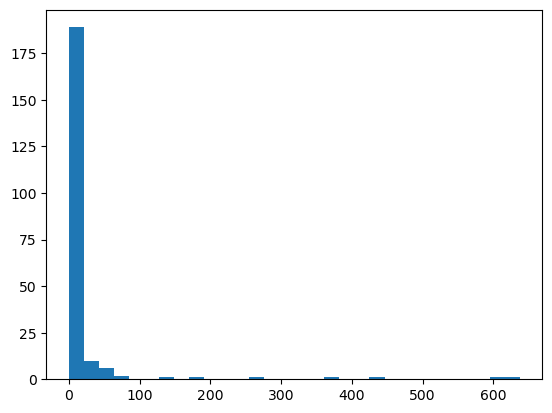

In [10]:
plt.hist(parks_flat['acreage'], bins=30)

## The Area Metric

As we can see, by and large, most parks are very small. Since we want big parks to hit a diminishing returns on area, we may want to use a log function. However, this penalizes big parks quite severely (yes I've tried that, feel free to change the function here and run the rest of the notebook). The result is since park size is no longer as important, the number of neighboring parks becomes the most influencial factor. This means urban areas in Pittsburgh (with a ton of small parks) ends up with the highest park score, an unexpected outcome.

The solution I landed on was to pick another function that's not as tough as logarithm. Square root ends up working nicely for us.

For area, let's ensure the smallest park get a score of 1. To accomplish this, we simply square root the ratio between each park's area and the smallest area.

(array([82., 56., 28., 15.,  8.,  3.,  6.,  1.,  5.,  1.,  2.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  2.]),
 array([  1.        ,  26.70105416,  52.40210833,  78.10316249,
        103.80421666, 129.50527082, 155.20632498, 180.90737915,
        206.60843331, 232.30948747, 258.01054164, 283.7115958 ,
        309.41264997, 335.11370413, 360.81475829, 386.51581246,
        412.21686662, 437.91792079, 463.61897495, 489.32002911,
        515.02108328, 540.72213744, 566.42319161, 592.12424577,
        617.82529993, 643.5263541 , 669.22740826, 694.92846242,
        720.62951659, 746.33057075, 772.03162492]),
 <BarContainer object of 30 artists>)

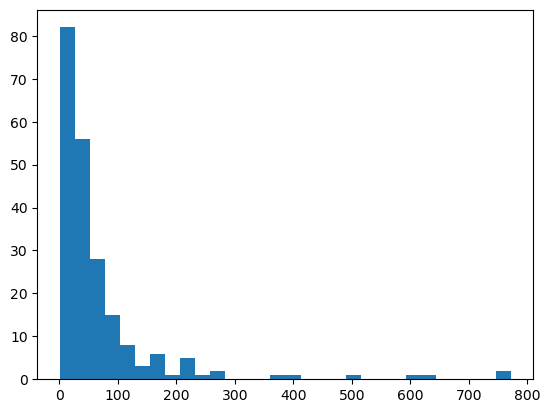

In [32]:
# find smallest area
minArea = parks_flat['acreage'].min()

parks_flat['area_score'] = parks_flat.apply(lambda r: math.sqrt(r['acreage'] / minArea), axis=1)
plt.hist(parks_flat['area_score'], bins=30)

We can see that on area, the smallest park is 1 point, while the biggest is 800 points. I think this is pretty reasonable.

Now that we have quantified the area of a park, let's "shrink" each park to just a single point (so it's easier to calculate distance later on). The other details about the shape of each park is not very interesting, since I can't really say whether round park or a square park should be consider better. To do this, we will reduce each park to a point at its centroid.

In [52]:
parks_center = gpd.GeoDataFrame(geometry=parks_flat.centroid)
parks_center['area_score'] = parks_flat['area_score']
parks_center['acreage'] = parks_flat['acreage']
parks_center['updatepknm'] = parks_flat['updatepknm']
parks_center.head(5)

,geometry,area_score,acreage,updatepknm
0,POINT (-8903967.257 4931052.291),29.946283,0.959034,August Wilson Park
1,POINT (-8909175.745 4934910.777),43.890630,2.060117,Young Field Park
2,POINT (-8896735.976 4923354.826),20.934625,0.468682,Roland Lockridge Community Park
3,POINT (-8899566.325 4933391.142),42.760913,1.955430,Friendship Park
4,POINT (-8897507.543 4935602.608),69.112126,5.108070,Heth's Park


/scratch/slurm-13218/ipykernel_4766/3499199483.py:2: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  parks_center.plot(ax=neighbor_flat.plot(neighbor_flat, color="white", edgecolor="blue"), markersize=parks_flat['Shape__Area'] / 10000, color='green')
/scratch/slurm-13218/ipykernel_4766/3499199483.py:3: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  parks_center.plot(ax=neighbor_flat.plot(neighbor_flat, color="white", edgecolor="blue"), markersize=parks_center['area_score'] / 5, color='green')


<Axes: >

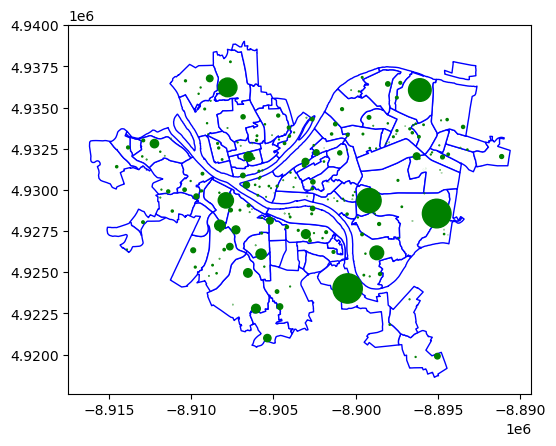

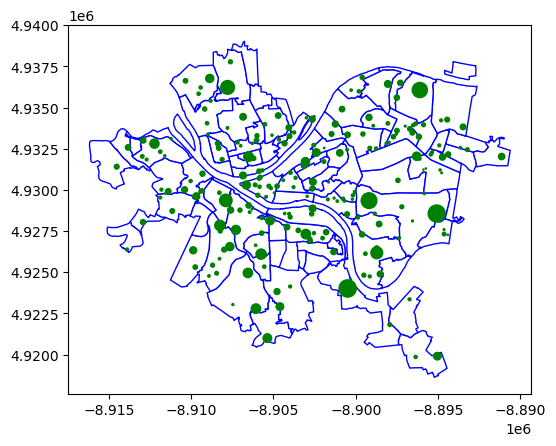

In [33]:
# raw area dot size vs adjusted dot size
parks_center.plot(ax=neighbor_flat.plot(neighbor_flat, color="white", edgecolor="blue"), markersize=parks_flat['Shape__Area'] / 10000, color='green')
parks_center.plot(ax=neighbor_flat.plot(neighbor_flat, color="white", edgecolor="blue"), markersize=parks_center['area_score'] / 5, color='green')

## Calculating Distance

Next, let's consider how we evaluate the spatial dimension. We could just have each park give a score to the neighborhood it's located in, but such a method doesn't feel right for very large parks. For large parks like Frick Park, adjacent neighborhoods should get quite a lot of benefit just from being close, even though Frick Park isn't technically in their border.

The way I would like to compute this is to allow every park to individually contribute a bit of a "park rating" score to each neighborhood. Then, a neighborhood's total "park rating" would be sum of the ratings it got from each individual park. Let's define a function for park rating given the neighborhood and the park.

To do this in SQL/pandas, we would typically perform a cartesian join between the neighbor and parks table. However, geopandas does not support a row containing multiple geometries. However, since converted the parks into individual points, we can convert the data into a non-geoseries (a regular dataframe with x,y, and areaScore as columns), and then sneak it into the neighborhood tables as regular data.

In [54]:
# First create our regular df
parks_flat['x'] = parks_center.geometry.x
parks_flat['y'] = parks_center.geometry.y
parks_sm = parks_flat[['x', 'y', 'area_score', 'updatepknm', 'acreage']].copy()
parks_sm.head()

,x,y,area_score,updatepknm,acreage
0,-8.903967e+06,4.931052e+06,29.946283,August Wilson Park,0.959034
1,-8.909176e+06,4.934911e+06,43.890630,Young Field Park,2.060117
2,-8.896736e+06,4.923355e+06,20.934625,Roland Lockridge Community Park,0.468682
3,-8.899566e+06,4.933391e+06,42.760913,Friendship Park,1.955430
4,-8.897508e+06,4.935603e+06,69.112126,Heth's Park,5.108070


In [55]:
# Cartesian join it onto the neighorhoods database
# Since a key column is demanded, we need to trick pandas by having both tables have a column with only one possible value
neighbor_flat['tmp'] = 1
parks_sm['tmp'] = 1

df = neighbor_flat.merge(parks_sm, how='inner', on='tmp')
df.drop(['tmp'], axis=1, inplace=True)
df.head()

,id,hood,acres,geometry,x,y,area_score,updatepknm,acreage
0,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.903967e+06,4.931052e+06,29.946283,August Wilson Park,0.959034
1,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.909176e+06,4.934911e+06,43.890630,Young Field Park,2.060117
2,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.896736e+06,4.923355e+06,20.934625,Roland Lockridge Community Park,0.468682
3,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.899566e+06,4.933391e+06,42.760913,Friendship Park,1.955430
4,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.897508e+06,4.935603e+06,69.112126,Heth's Park,5.108070


Looking Good! Now, we can calculate the distance in every row

In [109]:
from shapely.geometry import Point
df['distance'] = df.apply(lambda r: r['geometry'].distance(Point(r['x'], r['y'])), axis=1)
df.head()

,id,hood,acres,geometry,x,y,area_score,updatepknm,acreage,distance
0,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.903967e+06,4.931052e+06,29.946283,August Wilson Park,0.959034,8229.264964
1,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.909176e+06,4.934911e+06,43.890630,Young Field Park,2.060117,13648.430265
2,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.896736e+06,4.923355e+06,20.934625,Roland Lockridge Community Park,0.468682,8273.319895
3,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.899566e+06,4.933391e+06,42.760913,Friendship Park,1.955430,3957.299494
4,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.897508e+06,4.935603e+06,69.112126,Heth's Park,5.108070,3673.722082


For a sanity check, let's try to visualize this distance to see it's working

In [150]:
def plt_map_single_park(data, column, parkname, inverse=False):
    filtered_data = data[data['updatepknm'] == parkname][['id', column]]
    joined = neighbor_flat.merge(filtered_data, how='inner', left_on='id', right_on='id')
    filteredParks = parks_center[parks_center['updatepknm'] == parkname]

    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    cmap = 'Greens_r' if inverse else 'Greens'
    basePlt = joined.plot(ax=ax,column=column,cmap=cmap, legend=True)
    filteredParks.plot(ax=ax, color='red', markersize=filteredParks['acreage'])

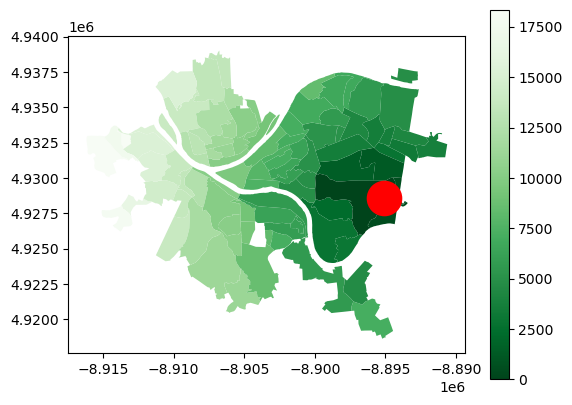

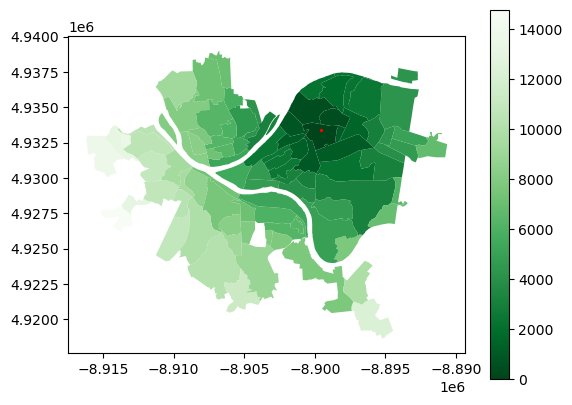

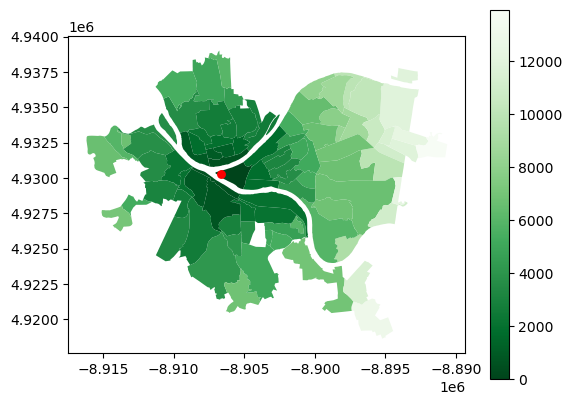

In [151]:
for p in ['Frick Park', 'Friendship Park', 'Point State Park']:
    plt_map_single_park(df, 'distance', p, True) 

(array([ 722.,  780., 1033., 1086., 1195., 1313., 1347., 1291., 1325.,
        1282., 1114., 1097.,  960.,  889.,  722.,  671.,  571.,  464.,
         369.,  290.,  239.,  176.,  140.,  100.,   78.,   51.,   26.,
          10.,    3.,    6.]),
 array([    0.        ,   745.86156966,  1491.72313932,  2237.58470898,
         2983.44627864,  3729.30784829,  4475.16941795,  5221.03098761,
         5966.89255727,  6712.75412693,  7458.61569659,  8204.47726625,
         8950.33883591,  9696.20040557, 10442.06197523, 11187.92354488,
        11933.78511454, 12679.6466842 , 13425.50825386, 14171.36982352,
        14917.23139318, 15663.09296284, 16408.9545325 , 17154.81610216,
        17900.67767181, 18646.53924147, 19392.40081113, 20138.26238079,
        20884.12395045, 21629.98552011, 22375.84708977]),
 <BarContainer object of 30 artists>)

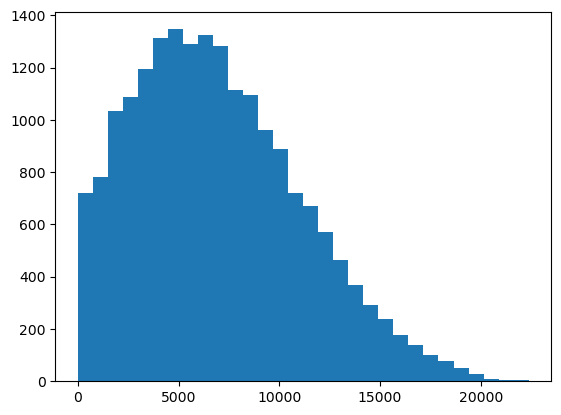

In [20]:
plt.hist(df['distance'], bins=30)

In [60]:
parks_center[parks_flat['updatepknm'] == 'Friendship Park']

,geometry,area_score,acreage,updatepknm
3,POINT (-8899566.325 4933391.142),42.760913,1.95543,Friendship Park


## The Distance Metric

Great! That seems to be working. Let's find a way to score a park based on distance.

We know that a park should give more score if it's closer, all else equal.The first idea is to use the inverse of the distance as a multiplier onto the area score. However, we notice as distance approaches to zero, the distance multiplier approaches infinity. Well, a park that is right outside (or in this acse, in the current neighborhood) should not be considered as "infinitely good".

Let's approach this from a different direction. Suppose we constraint it so that they multiplier can be 1 at most (when the park is inside of the neighborhood) and 0 when it is sufficiently far away.

Let's say there is some maximum distance betfore a park no longer contributes to a neighborhood's park score, because it's just so far away, that a reasonable family just won't bother visiting anymore. Hoever, while a small playground on the other side of town may be very uninteresting, perhaps a park as big as Frick Park can still justify a drive across the city to visit. This gives us an idea that the radius should somehow be dependant on the distance.

We know for tiny parks, like our [Friendship Park!](https://www.google.com/maps/place/Friendship+Parklet,+4750+Friendship+Ave,+Pittsburgh,+PA+15224/@40.4629354,-79.9501368,16z/data=!4m6!3m5!1s0x8834f2412143f5a9:0x7803646b65ada56b!8m2!3d40.4625423!4d-79.9461137!16s%2Fg%2F11bvtbs79h?entry=ttu&g_ep=EgoyMDI1MDQxNC4xIKXMDSoASAFQAw%3D%3D) should have close to 0 radius (so they only affect their residing neighborhood). Big parks like Frick Park, should catch attention across the city, and so should perhaps have a radius 10000 (see above maps for scale).

(array([30., 87., 54., 18., 11.,  7.,  1.,  2.,  1.,  3.]),
 array([ 1.        ,  3.67854571,  6.35709142,  9.03563712, 11.71418283,
        14.39272854, 17.07127425, 19.74981995, 22.42836566, 25.10691137,
        27.78545708]),
 <BarContainer object of 10 artists>)

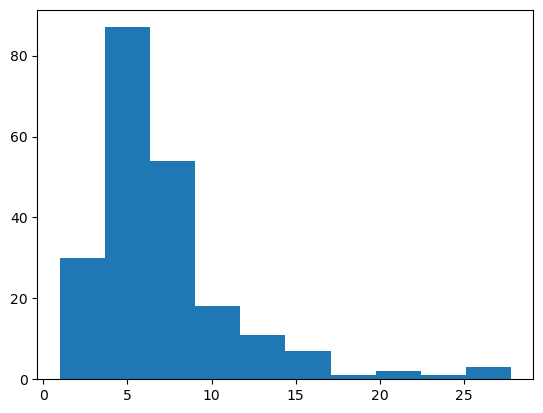

In [102]:
 plt.hist(parks_sm.apply(lambda r: math.sqrt(r['area_score']), axis=1))

In [176]:
max_radius = 12000
max_acreage = parks_sm['acreage'].max()

def dst_score (acreage, dx):
    ratio = acreage / max_acreage
    radius = (ratio ** (4/5)) * max_radius
    value = max(0, (radius - dx) / radius)
    return value * value * value

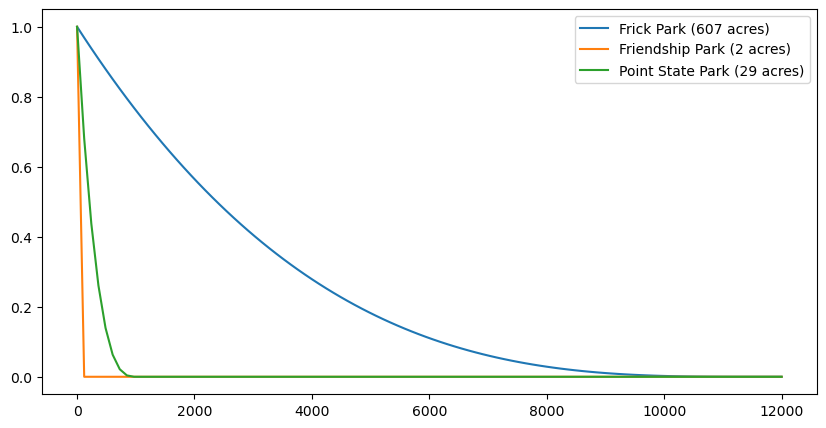

In [177]:
import numpy as np

x = np.linspace(0, 12000, 100)
fig = plt.figure(figsize = (10, 5))
for p in ['Frick Park', 'Friendship Park', 'Point State Park']:
    acreage = parks_flat[parks_flat['updatepknm'] == p].iloc[0].acreage
    y = list(map(lambda x: dst_score(acreage, x), x))
    plt.plot(x, y, label = f'{p} ({round(acreage)} acres)')

plt.legend()
plt.show()

Let's apply this to our parks!

In [178]:
from shapely.geometry import Point
df['dst_score'] = df.apply(lambda r: dst_score(r['area_score'], r['distance']), axis=1)
df.head()

,id,hood,acres,geometry,x,y,area_score,updatepknm,acreage,distance,dst_score,score
0,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.903967e+06,4.931052e+06,29.946283,August Wilson Park,0.959034,8229.264964,0.0,0.000000
1,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.909176e+06,4.934911e+06,43.890630,Young Field Park,2.060117,13648.430265,0.0,0.000000
2,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.896736e+06,4.923355e+06,20.934625,Roland Lockridge Community Park,0.468682,8273.319895,0.0,0.000000
3,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.899566e+06,4.933391e+06,42.760913,Friendship Park,1.955430,3957.299494,0.0,0.000000
4,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",-8.897508e+06,4.935603e+06,69.112126,Heth's Park,5.108070,3673.722082,0.0,1.449426


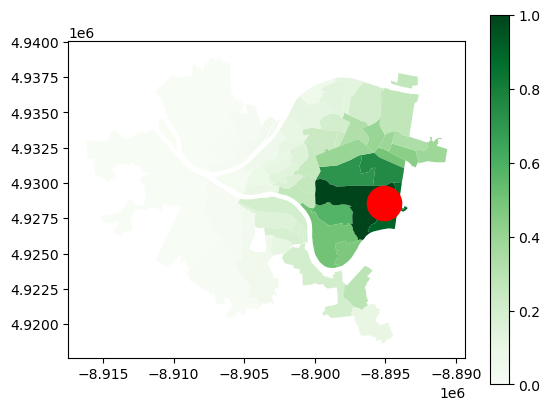

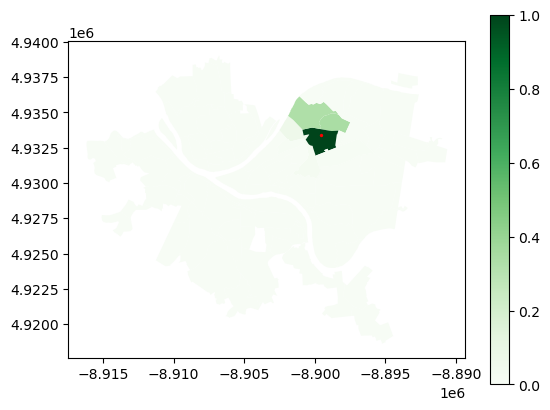

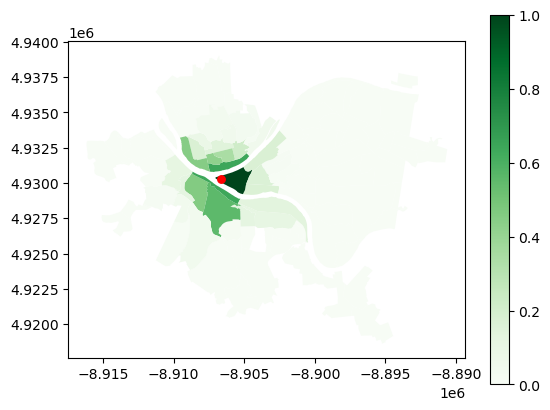

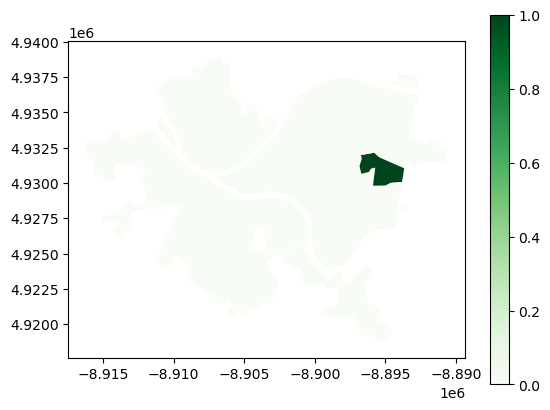

In [179]:
for p in ['Frick Park', 'Friendship Park', 'Point State Park', 'Glen Arden Circle']:
    plt_map_single_park(df, 'dst_score', p) 

## Putting It Together

Now, we multiply the park score by the multiplier to get the final score. Then, we aggregate the data by neighborhood and get our final total score

In [185]:
df['score'] = df['dst_score'] * df['area_score']
scores = df.groupby('id').agg({'score': 'sum'})
final = neighbor_flat.merge(scores, how='inner', left_on='id', right_on='id')
final.head()

,id,hood,acres,geometry,tmp,score
0,1,Point Breeze North,193.229239,"POLYGON ((-8895018.787 4932355.299, -8894970.3...",1,1090.044737
1,2,Squirrel Hill North,782.981547,"POLYGON ((-8896723.646 4930708.416, -8896711.1...",1,1638.797172
2,3,Garfield,292.726125,"POLYGON ((-8898374.292 4934854.383, -8898357.1...",1,918.689723
3,4,Bedford Dwellings,112.431551,"POLYGON ((-8901775.326 4932312.726, -8901768.7...",1,1091.325203
4,5,Knoxville,191.759777,"POLYGON ((-8904244.17 4926947.863, -8904249.84...",1,1068.765780


Let's rescale the data to 0-1 just for simplicity

<Axes: >

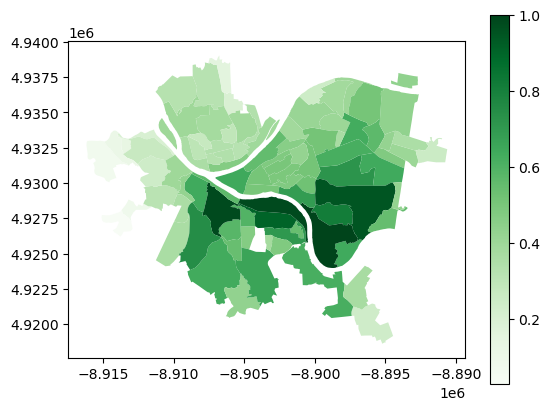

In [192]:
maxScore = final['score'].max()
final['score_adjusted'] = final['score'] / maxScore

final.plot(column='score_adjusted',cmap='Greens', legend=True)

Comparing it to the parks map in the beginning, I'd say it's a decently fair assessment.

<Axes: >

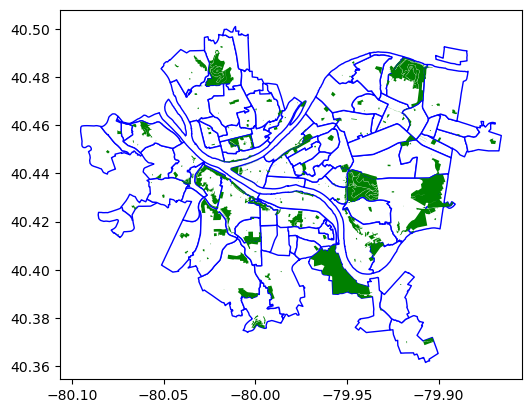

In [182]:
basePlot = neighborhoods.plot(color="white", edgecolor="blue")
parks.plot(ax=basePlot, color='green')

In [196]:
final[['hood', 'score_adjusted']].sort_values('score_adjusted', ascending=False).reset_index().drop('index', axis=1).head(10)

,hood,score_adjusted
0,Hazelwood,1.000000
1,Mount Washington,0.979084
2,South Side Flats,0.979082
3,Squirrel Hill South,0.947704
4,South Side Slopes,0.902569
5,Greenfield,0.811234
6,Beechview,0.746437
7,Squirrel Hill North,0.721463
8,Arlington,0.704996
9,South Oakland,0.690571
